**Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [5]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [6]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [7]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [8]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.5       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

Стандартизация

3.0


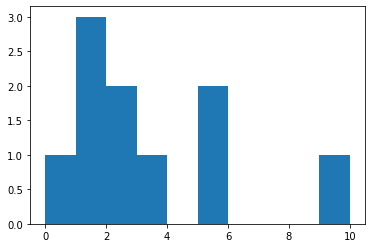

In [9]:
print(np.mean(X[:, 1]))
plt.hist(X[:, 1])
plt.show()

975.0


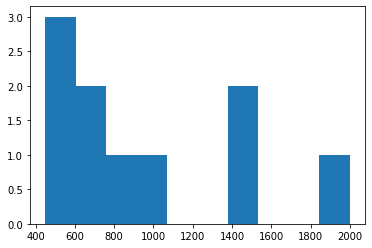

In [10]:
print(np.mean(X[:, 2]))
plt.hist(X[:, 2])
plt.show()

In [11]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [12]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

4.4408920985006264e-17


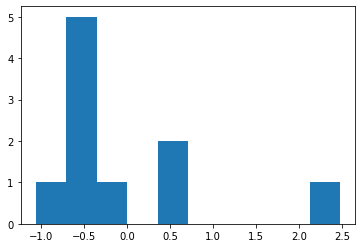

In [13]:
print(np.mean(X_st[:, 1]))
plt.hist(X_st[:, 1])
plt.show()

-4.163336342344337e-17


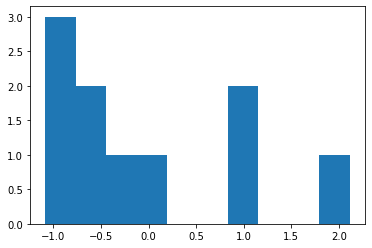

In [14]:
print(np.mean(X_st[:, 2]))
plt.hist(X_st[:, 2])
plt.show()

SGD (Stochastic gradient descent)

In [15]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
W = np.random.randn(X.shape[1])
W

array([0.84909851, 0.04318327, 0.41301147, 0.42982761])

In [23]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [24]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [ 2.47972326  0.43943723 -0.97897046  1.47138902], error 3354.774573440267
Iter: 500, weights: [23.68238436  5.30806727 -6.95773683 18.97084859], error 39.19728513578613
Iter: 1000, weights: [28.37095445  6.11119627 -5.84361854 16.31533609], error 32.878651487850746
Iter: 1500, weights: [31.77122342  6.21685136 -4.55321694 14.37393759], error 29.451054351574424
Iter: 2000, weights: [34.3245105   6.24411416 -3.53155663 12.91442836], error 27.49789025818101
Iter: 2500, weights: [36.25133022  6.2591949  -2.75501036 11.81284104], error 26.383824162430596
Iter: 3000, weights: [37.7063969   6.27000682 -2.16800651 10.98094211], error 25.748359581071746
Iter: 3500, weights: [38.80531781  6.27811191 -1.72461801 10.35265888], error 25.385889722133058
Iter: 4000, weights: [39.63527518  6.28422691 -1.3897435   9.87814928], error 25.179136421616036
Iter: 4500, weights: [40.26209963  6.2888446  -1.1368292   9.51977637], error 25.0612040577897
Final MSE: 24.993935277059578


array([40.73468791,  6.29232599, -0.94614682,  9.24958455])

In [25]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)

            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [26]:
stohastic_gradient_descent(X_st, y, iterations=50000, batch_size=4, eta=1e-2)

amount of batches is 3
Iter: 0, weights: [ 2.71354566  0.9053563  -0.2472523   3.68462444], error 2614.83411021361
Iter: 5000, weights: [41.55519701  6.08526209 -0.93996135  9.15859062], error 7.033205243180062
Iter: 10000, weights: [41.57165961  6.08514951 -0.93324352  9.14929796], error 7.038110298343053
Iter: 15000, weights: [41.57167097  6.08514943 -0.93323888  9.14929155], error 7.0381136840146254
Iter: 20000, weights: [41.57167098  6.08514943 -0.93323888  9.14929155], error 7.038113686350584
Iter: 25000, weights: [41.57167098  6.08514943 -0.93323888  9.14929155], error 7.038113686351991
Iter: 30000, weights: [41.57167098  6.08514943 -0.93323888  9.14929155], error 7.038113686351991
Iter: 35000, weights: [41.57167098  6.08514943 -0.93323888  9.14929155], error 7.038113686351991
Iter: 40000, weights: [41.57167098  6.08514943 -0.93323888  9.14929155], error 7.038113686351991
Iter: 45000, weights: [41.57167098  6.08514943 -0.93323888  9.14929155], error 7.038113686351991
Final MSE: 2

array([41.57167098,  6.08514943, -0.93323888,  9.14929155])

##### L1 регуляризация

$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda |w| = \lambda w/|w| $$

##### L2 регуляризация

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda ||w||^{2} = 2\lambda w $$

In [27]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [28]:
W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [1.63622804 0.1037     0.43090338 2.3039224 ], error 3239.17392153736
Iter: 500, weights: [23.05411239  5.08298632 -6.9430652  19.27980503], error 40.237493647515976
Iter: 1000, weights: [27.51288221  5.92481014 -5.96253169 16.75699324], error 33.84010025267396
Iter: 1500, weights: [30.57509157  6.02805432 -4.80861253 15.00887539], error 30.500309800359577
Iter: 2000, weights: [32.76090504  6.05220387 -3.9348114  13.75944775], error 28.58943924697119
Iter: 2500, weights: [34.32977675  6.0645638  -3.30260693 12.86250648], error 27.463950396792235
Iter: 3000, weights: [35.45670384  6.07294551 -2.84798949 12.21821364], error 26.782651354781365
Iter: 3500, weights: [36.26626675  6.07891724 -2.52135088 11.75536434], error 26.358844665690714
Iter: 4000, weights: [36.84784993  6.08320234 -2.28669146 11.42285714], error 26.088254214108037
Iter: 4500, weights: [37.26565524  6.08628023 -2.11811326 11.18398626], error 25.911343134424556
Final MSE: 25.793272231967812


In [29]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [ 0.90297079  0.83241246 -0.19473346  2.17933247], error 3354.753557489645
Iter: 500, weights: [22.8266092   5.25525566 -7.25597375 19.4586018 ], error 40.551379382441
Iter: 1000, weights: [27.73314895  6.10162029 -6.09602865 16.67982806], error 33.63116582027539
Iter: 1500, weights: [31.29041465  6.21279789 -4.74669862 14.64881261], error 29.88007107967518
Iter: 2000, weights: [33.96147375  6.24138615 -3.67798232 13.12198479], error 27.74259958046204
Iter: 2500, weights: [35.97715683  6.25716955 -2.86562958 11.96959338], error 26.523406666266766
Iter: 3000, weights: [37.49932869  6.26848083 -2.25155488 11.09932873], error 25.827977630819795
Iter: 3500, weights: [38.64892983  6.27695979 -1.78771819 10.44207022], error 25.43130396599721
Iter: 4000, weights: [39.51716329  6.28335682 -1.4373999   9.94567712], error 25.205040768085478
Iter: 4500, weights: [40.17289572  6.28818747 -1.17282166  9.57077672], error 25.075979932249183
Final MSE: 25.00236345594842


array([40.66727889,  6.29182942, -0.97334536,  9.28812415])

## Домашнее задание <a class='anchor' id='hw'>

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [91]:
def gradient_descent_reg_l2_plot(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    # Начало изменений
    coeffs = np.zeros((iterations, X.shape[1]))
    alpha_list = np.linspace(-50, iterations, iterations)
    # Конец изменений
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации L2
        
        W -= eta * dQ + dReg
        #
        coeffs[i, :] = W
        #
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    
    # Начало изменений
    plt.figure(figsize=(13, 9))
    for i in range(X.shape[1]):
        plt.plot(alpha_list, coeffs[:, i])
    plt.title('График весов Ridge')
    plt.xticks(np.arange(0, iterations+1, 500))
    plt.xlabel('Итерация')
    plt.yticks(np.arange(-10, 41, 5))
    plt.ylabel('Веса признаков');
    # Конец изменений
    
    return W

Iter: 0, weights: [ 2.17935296  0.65978793 -0.55720795  2.39345534], error 3164.3440269921125
Iter: 500, weights: [23.12442178  5.16647916 -6.99864939 19.24231401], error 40.08786829299145
Iter: 1000, weights: [27.54893604  5.93335151 -5.95635782 16.73665023], error 33.79696252505871
Iter: 1500, weights: [30.59955058  6.02905991 -4.79957882 14.99491841], error 30.476786822667755
Iter: 2000, weights: [32.77833243  6.05241458 -3.927863   13.74948671], error 28.57580906985512
Iter: 2500, weights: [34.34228213  6.06466414 -3.2975695  12.85535708], error 27.455806819549753
Iter: 3000, weights: [35.46568618  6.07301249 -2.84436607 12.21307821], error 26.77764805135639
Iter: 3500, weights: [36.27271946  6.07896485 -2.51874739 11.75167515], error 26.355687084421152
Iter: 4000, weights: [36.8524855   6.08323649 -2.28482108 11.42020686], error 26.086211198895604
Iter: 4500, weights: [37.26898541  6.08630477 -2.11676959 11.18208232], error 25.90999175334981
Final MSE: 25.792361433443187


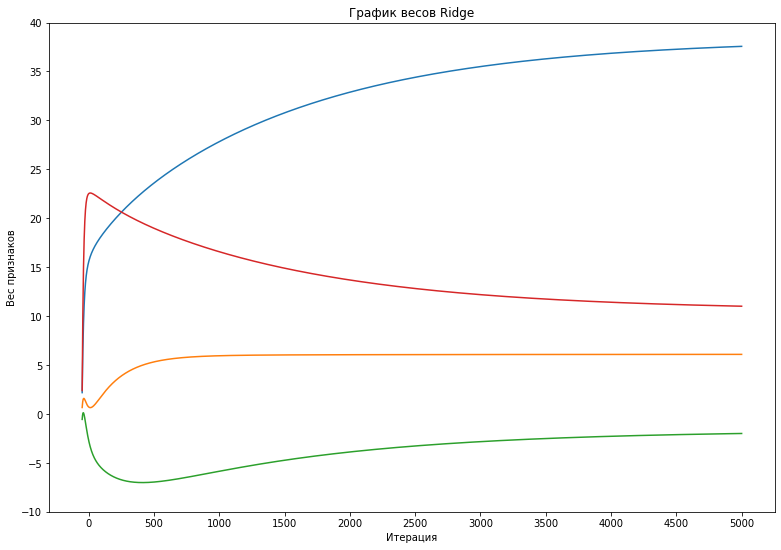

In [92]:
W = gradient_descent_reg_l2_plot(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda |w| = \lambda w/|w| $$

In [96]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        
        # Начало изменений
        dReg = reg * W / abs(W) # градиент регуляризации L1
        # Конец изменений
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [97]:
W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 1.2804836  -0.08555332  0.06100692  1.67535582], error 3441.512645259787
Iter: 500, weights: [23.18890814  5.18361352 -7.03285883 19.24705042], error 40.003537125220234
Iter: 1000, weights: [28.01328141  6.07508214 -5.95231472 16.51674465], error 33.28770256172176
Iter: 1500, weights: [31.50011915  6.19053473 -4.63625164 14.5261512 ], error 29.68389502679862
Iter: 2000, weights: [34.1171096   6.21922744 -3.58985993 13.03025232], error 27.631342850914177
Iter: 2500, weights: [36.09186528  6.23476206 -2.79407414 11.90126196], error 26.460525718619767
Iter: 3000, weights: [37.58311711  6.2458511  -2.19248081 11.04867533], error 25.79258238656285
Iter: 3500, weights: [38.7093649   6.25415861 -1.73806744 10.4047686 ], error 25.41149891787278
Iter: 4000, weights: [39.55996066  6.26042577 -1.39486576  9.91845947], error 25.19406151697445
Iter: 4500, weights: [40.20237222  6.26515829 -1.1356623   9.55117497], error 25.069984354860445
Final MSE: 24.9991723705752


3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [107]:
X[:, 1]

array([ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2])

Нормализация

In [108]:
min_max_scale(X[:, 1])

array([0.1, 0.1, 0.2, 0.5, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

Стандартизация

In [109]:
standart_scale(X[:, 1])

array([-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
       -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339])

Стандартизация нормализованных значений

In [110]:
standart_scale(min_max_scale(X[:, 1]))

array([-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,  7.07106781e-01,
       -1.96261557e-16, -1.06066017e+00,  7.07106781e-01,  2.47487373e+00,
       -7.07106781e-01, -3.53553391e-01])

Нормализация стандартизованных значений

In [111]:
min_max_scale(standart_scale(X[:, 1]))

array([0.1, 0.1, 0.2, 0.5, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

**Значения не изменятся, достаточно провести либо нормализацию, либо стандартизацию**

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [112]:
from sklearn import datasets

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [113]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10
display(X, Y, coef)

array([[  3.78794466,  -0.61837549],
       [ -6.52931145,  -1.06706712],
       [-10.6581629 ,  -0.34682333],
       ...,
       [ 11.94510163,   1.00147133],
       [  1.25623099,   0.35261274],
       [ -0.5674652 ,   0.41214611]])

array([-2.61123036e+01, -1.22254125e+02, -9.33701155e+01,  2.23698676e+01,
       -1.19353069e+00,  7.55093913e+01,  4.17391914e+00,  3.37850492e+01,
       -4.13327830e+01, -1.71060319e+00,  6.91533479e+01, -3.84944494e+01,
       -1.40841311e+01, -7.87094871e+00,  2.24655412e+01,  3.52449558e+01,
        3.54202311e+01,  4.54019343e+01,  3.93612257e+01,  1.13645719e-01,
       -1.23294801e+01,  1.18940297e+02,  2.90747757e+02,  1.07353713e+01,
        1.33621709e+02, -8.58105655e+01, -1.19323461e+01,  5.66776267e+01,
        1.45867826e+02, -2.72626165e+02, -3.86689973e+00,  4.64700598e+01,
        1.34844522e+02,  1.01167107e+01,  1.02407708e+01,  1.50555004e+01,
        6.05940840e+01, -1.46615087e-01, -1.04571676e+02, -1.09697817e+02,
        1.21274981e+01,  9.99648515e+01,  8.47610760e+01, -1.05265489e+02,
        1.35034101e+02, -3.24978496e+02,  6.56243085e+01, -4.80030943e+01,
        8.43343786e+01,  3.38914896e+00,  2.65015621e+01,  6.26227854e+01,
       -1.45046490e+02,  

array([62.6735955, 68.0472182])

Отмасштабируем получившиеся признаки методом стандартизации.

In [114]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(means, stds)

array([-0.79012702,  0.02045785])

array([9.85635367, 0.99101454])

In [115]:
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [116]:
X

array([[ 0.46447924, -0.64462559],
       [-0.58228272, -1.09738549],
       [-1.00118525, -0.3706113 ],
       ...,
       [ 1.29208317,  0.98990825],
       [ 0.20761816,  0.33516651],
       [ 0.02259069,  0.39523966]])

In [117]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)

array([-2.40328590e-17,  9.54791801e-18])

array([1., 1.])

In [119]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

SGD

In [120]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)

    error = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors[-1], 4)}')

Iteration #0: W_new = [-0.8770491   1.16866253], MSE = 8143.11
Iteration #100: W_new = [57.29306457 59.90767571], MSE = 114.36
Iteration #200: W_new = [61.09511797 65.77858669], MSE = 42.21
Iteration #300: W_new = [61.22020165 66.88497513], MSE = 39.22
Iteration #400: W_new = [60.81127707 67.86690624], MSE = 39.01
Iteration #500: W_new = [63.01727104 68.87449656], MSE = 42.44
Iteration #600: W_new = [61.62004236 68.5922277 ], MSE = 39.45
Iteration #700: W_new = [61.34086506 68.62524345], MSE = 39.5
Iteration #800: W_new = [62.20610311 67.60795163], MSE = 39.17
Iteration #900: W_new = [62.40866111 67.70560306], MSE = 39.51
Iter 1000: error - 38.84856056035663, weights: [61.32996117 68.18159256]
В случае использования стохастического градиентного спуска ошибка составляет 38.8486
Wall time: 199 ms


GD

In [128]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_GD = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_GD.append(mserror(X, new_w, Y))
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(mserror(X, new_w, Y), 2)}')    
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {mserror(X, new_w, Y)}, weights: {new_w}')
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_GD[-1], 4)}')

Iteration #0: W_new = [1.19602793 1.32362532], MSE = 7875.58
Iteration #100: W_new = [53.00350458 58.46260608], MSE = 190.62
Iteration #200: W_new = [60.25620569 66.38834625], MSE = 41.52
Iteration #300: W_new = [61.27105576 67.48815951], MSE = 38.63
Iteration #400: W_new = [61.41300062 67.64082996], MSE = 38.57
Iteration #500: W_new = [61.43284656 67.66202988], MSE = 38.57
Iteration #600: W_new = [61.43562035 67.6649746 ], MSE = 38.57
Iteration #700: W_new = [61.43600792 67.66538374], MSE = 38.57
Iteration #800: W_new = [61.43606205 67.6654406 ], MSE = 38.57
Iteration #900: W_new = [61.43606961 67.6654485 ], MSE = 38.57
Iter 965: error - 38.568251745852464, weights: [61.43607049 67.66544942]
В случае использования градиентного спуска функционал ошибки составляет 38.5683
Wall time: 272 ms


Text(0, 0.5, 'MSE')

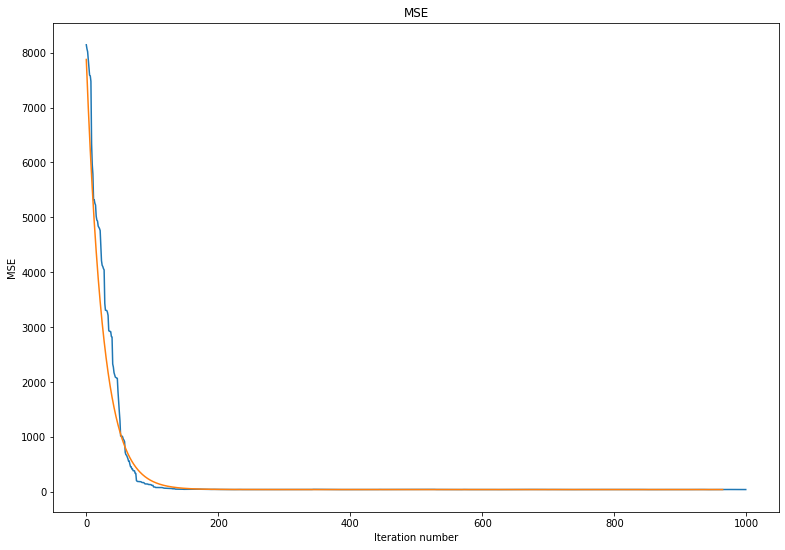

In [129]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 9))
plt.plot(range(len(errors)), errors)
plt.plot(range(len(errors_GD)), errors_GD)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

В случае градиентного спуска (GD) MSE плавнее снижается по сравнению со стохастическим градиентным спуском SGD